In [1]:
import numpy as np

In [2]:
import scipy.spatial

In [3]:
import cwipc

In [38]:
pc = cwipc.cwipc_read("vrsmall/boxes.ply", 0)

[pcl::PLYReader] vrsmall/boxes.ply:25: property 'float32 focal' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:26: property 'float32 scalex' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:27: property 'float32 scaley' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:28: property 'float32 centerx' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:29: property 'float32 centery' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:32: property 'float32 k1' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:33: property 'float32 k2' of element 'camera' is not handled


In [39]:
# pc = cwipc.cwipc_read("genregtest03/genregtest03.ply", 0)

In [40]:
# pc = cwipc.cwipc_read("genregtest003/genregtest003.ply", 0)

In [151]:
pc_cam1 = cwipc.cwipc_tilefilter(pc, 1)
np_cam1 = np.ctypeslib.as_array(pc_cam1.get_points())

In [152]:
pc_cam2 = cwipc.cwipc_tilefilter(pc, 2)
np_cam2 = np.ctypeslib.as_array(pc_cam2.get_points())

In [154]:
pc_cam4 = cwipc.cwipc_tilefilter(pc, 4)
np_cam4 = np.ctypeslib.as_array(pc_cam4.get_points())

In [155]:
pc_cam8 = cwipc.cwipc_tilefilter(pc, 8)
np_cam8 = np.ctypeslib.as_array(pc_cam8.get_points())

In [156]:
xyz_cam1 = np_cam1[['x','y','z']]

In [157]:
xyz_cam2 = np_cam2[['x','y','z']]

In [158]:
xyz_cam4 = np_cam4[['x','y','z']]

In [159]:
xyz_cam8 = np_cam8[['x','y','z']]

In [160]:
points_cam1 = np.column_stack([xyz_cam1['x'],xyz_cam1['y'],xyz_cam1['z']])

In [161]:
points_cam2 = np.column_stack([xyz_cam2['x'],xyz_cam2['y'],xyz_cam2['z']])

In [162]:
points_cam4 = np.column_stack([xyz_cam4['x'],xyz_cam4['y'],xyz_cam4['z']])

In [163]:
points_cam8 = np.column_stack([xyz_cam8['x'],xyz_cam8['y'],xyz_cam8['z']])

In [165]:
tree_cam1 = scipy.spatial.KDTree(points_cam1)

In [166]:
tree_cam2 = scipy.spatial.KDTree(points_cam2)

In [167]:
tree_cam4 = scipy.spatial.KDTree(points_cam4)

In [168]:
tree_cam8 = scipy.spatial.KDTree(points_cam8)

In [169]:
dists_1to2, _ = tree_cam2.query(points_cam1)

In [170]:
dists_1to4, _ = tree_cam4.query(points_cam1)

In [171]:
dists_1to8, _ = tree_cam8.query(points_cam1)

In [172]:
dists_2to4, _ = tree_cam4.query(points_cam2)

In [173]:
dists_2to8, _ = tree_cam8.query(points_cam2)

In [174]:
dists_4to8, _ = tree_cam8.query(points_cam4)

In [175]:
histogram_1to2, edges_1to2 = np.histogram(dists_1to2, bins=400)

In [176]:
histogram_1to4, edges_1to4 = np.histogram(dists_1to4, bins=400)

In [177]:
histogram_1to8, edges_1to8 = np.histogram(dists_1to8, bins=400)

In [178]:
histogram_2to4, edges_2to4 = np.histogram(dists_2to4, bins=400)

In [179]:
histogram_2to8, edges_2to8 = np.histogram(dists_2to8, bins=400)

In [180]:
histogram_4to8, edges_4to8 = np.histogram(dists_4to8, bins=400)

In [181]:
from matplotlib import pyplot as plt

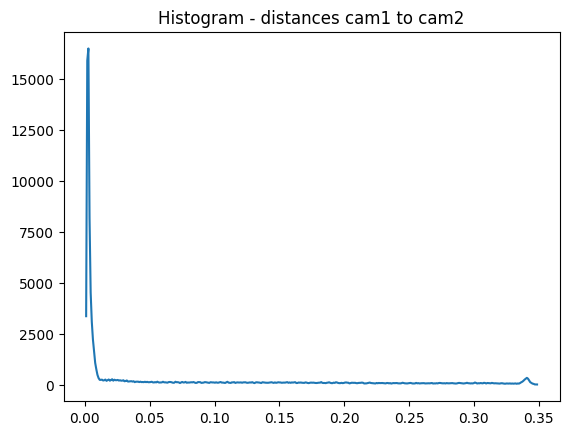

In [184]:
plt.plot(edges_1to2[1:], histogram_1to2)
plt.title("Histogram - distances cam1 to cam2")
plt.show()

In [185]:
histogram_1to2, edges_1to2

(array([ 3351, 15889, 16483,  8192,  4511,  3080,  2211,  1638,  1061,
          748,   476,   316,   230,   227,   240,   197,   210,   243,
          181,   213,   246,   188,   219,   259,   189,   235,   213,
          212,   225,   193,   209,   187,   193,   208,   160,   174,
          199,   145,   151,   161,   163,   144,   160,   117,   138,
          137,   140,   119,   139,   119,   123,   116,   135,   116,
          131,   113,   114,   121,   135,   107,   101,   118,   104,
          139,   107,    97,   103,   105,   135,   107,   107,   100,
           91,   118,   125,   120,   103,    85,    90,   135,   113,
          115,   104,    73,   100,   127,    99,   104,   128,    85,
          100,    95,   103,   111,   106,   122,    96,    77,    85,
          119,   116,   114,    79,    87,    95,   117,   112,    99,
           90,    80,   113,   105,   101,   102,    88,   108,    90,
           90,   104,   123,    95,    95,    84,    77,   105,   134,
      